Gêneros únicos no dataset:
Shooter
Misc
Sports
Platform
Adventure
Racing
Simulation
Role-Playing
Fighting
Puzzle
Action


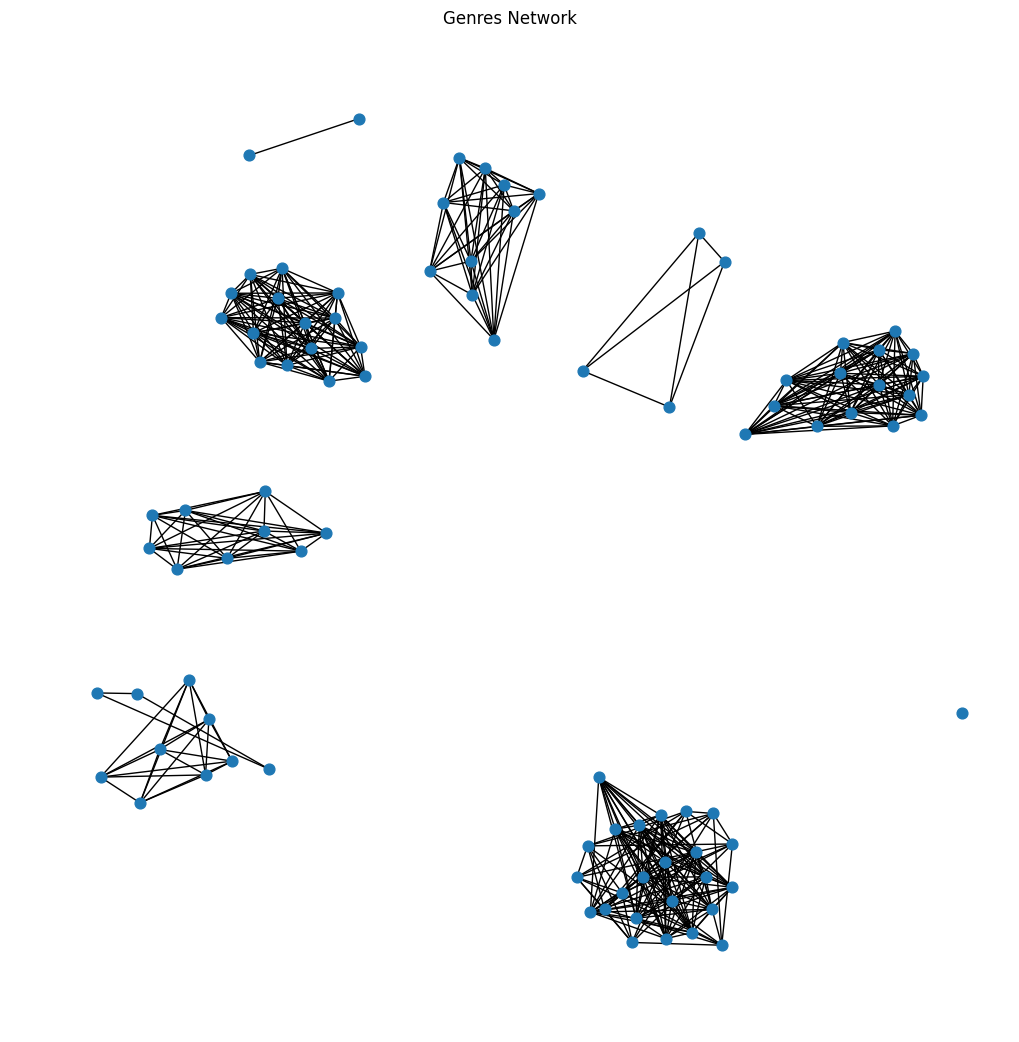

In [12]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Carregar o dataset
df = pd.read_csv('data_game.csv')
#Slecionando as 100 primeiras linhas para uma análise
df = df.head(100) 

#print(df)

# Filtragem e preparação dos dados
# Mantém apenas as colunas de interesse: Nome e Gênero
df_genre = df[['Name', 'Genre']].dropna()

# Criar um conjunto para armazenar gêneros únicos
unique_genres = set()

# Adicionar gêneros ao conjunto
for genres in df_genre['Genre'].str.split(','):
    genres = [genre.strip() for genre in genres]  # Remover espaços em branco
    unique_genres.update(genres)  # Adicionar gêneros ao conjunto

# Imprimir gêneros únicos
print("Gêneros únicos no dataset:")
for genre in unique_genres:
    print(genre)

# Criar um grafo vazio
G = nx.Graph()

# Adicionar nós e arestas com base no gênero
for _, row in df.iterrows():
    genre = row['Genre']
    name = row['Name']
    
    # Adicionar o nó para o jogo
    if not G.has_node(name):
        G.add_node(name, genre=genre)
    
    # Adicionar nós e arestas para jogos com o mesmo gênero
    for other_name in df[df['Genre'] == genre]['Name']:
        if other_name != name:
            G.add_edge(name, other_name)
                

# Desenhar o grafo
pos = nx.spring_layout(G, k=0.5, iterations=50)
plt.figure(figsize= (10,10))
nx.draw(G, pos, with_labels=False, node_size=60, font_size=8) #Retirando os names dos nós para melhor visualização
plt.title("Genres Network")
plt.show()


In [6]:
#Análise descritiva básica

nodes = G.nodes()
edges = G.edges()
densidade = nx.density(G)
number_nodes = G.number_of_nodes()
number_edges = G.number_of_edges()



print(f'Nós da rede: {nodes}')
print(f'Number of nodes: {G.number_of_nodes()}')
print(f'Arestas da rede: {edges}')
print(f'Number of edges: {G.number_of_edges()}')
print(f'Densidade da rede: {densidade}')



Nós da rede: ['Wii Sports', 'Wii Sports Resort', 'Wii Fit', 'Wii Fit Plus', 'FIFA 16', 'Mario & Sonic at the Olympic Games', 'FIFA 17', 'Super Mario Bros.', 'New Super Mario Bros.', 'New Super Mario Bros. Wii', 'Super Mario World', 'Super Mario Land', 'Super Mario Bros. 3', 'Super Mario 64', 'Super Mario Galaxy', 'Super Mario 3D Land', 'Super Mario All-Stars', 'New Super Mario Bros. 2', 'Donkey Kong Country', 'Crash Bandicoot 2: Cortex Strikes Back', 'Super Mario Galaxy 2', 'Super Mario Bros. 2', 'Mario Kart Wii', 'Mario Kart DS', 'Gran Turismo 3: A-Spec', 'Mario Kart 7', 'Gran Turismo 4', 'Gran Turismo', 'Gran Turismo 5', 'Mario Kart 64', 'Gran Turismo 2', 'Super Mario Kart', 'Pokemon Red/Pokemon Blue', 'Pokemon Gold/Pokemon Silver', 'Pokemon Diamond/Pokemon Pearl', 'Pokemon Ruby/Pokemon Sapphire', 'Pokemon Black/Pokemon White', 'Pokémon Yellow: Special Pikachu Edition', 'Pokemon X/Pokemon Y', 'Pokemon Omega Ruby/Pokemon Alpha Sapphire', 'Pokemon FireRed/Pokemon LeafGreen', 'Final Fan

Gêneros únicos no dataset:
Entertainment Analysis & Development Division
The Sims Studio
SquareSoft
Nd Cube
Nintendo EAD Tokyo
Good Science Studio
Rockstar North
Bungie Software
Hudson
Electronic Arts
DMA Design
Bungie
Infinity Ward
Ubisoft
Rockstar Leeds
Retro Studios
Sledgehammer Games
Polyphony Digital
Hudson Soft
Treyarch
Game Arts
Game Freak
Nintendo
343 Industries
EA Vancouver
Bethesda Game Studios
EA Sports
Número de desenvolvedores: 27


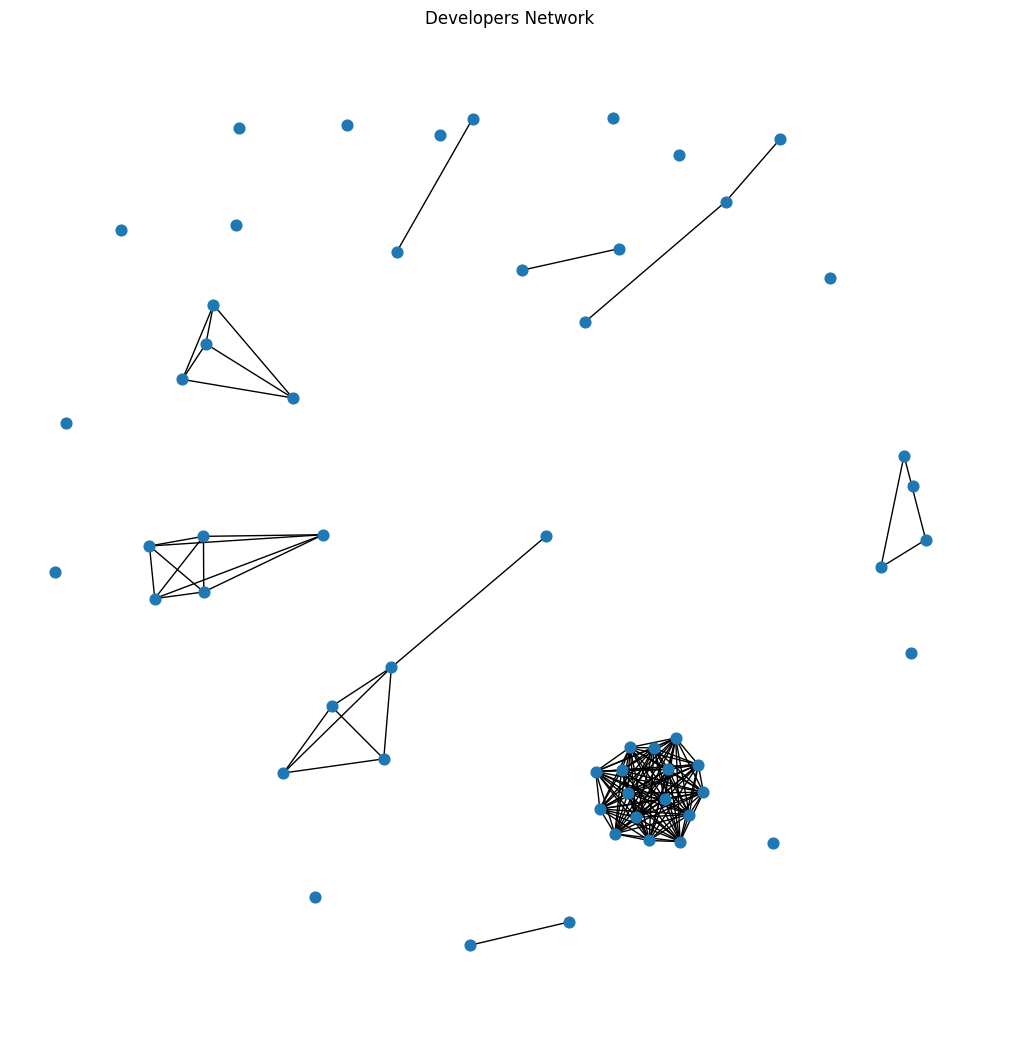

Número de componentes: 23


In [25]:
#----------------MONTANDO REDE COM OS DESENVOLVEDORES DOS GAMES----------------

# Carregar o dataset
df = pd.read_csv('data_game.csv')
#Slecionando as 100 primeiras linhas para uma análise
df = df.head(100) 

# Filtragem e preparação dos dados
# Mantém apenas as colunas de interesse: Nome e Gênero

df_developer = df[['Name', 'Developer']].dropna()

# Criar um conjunto para armazenar gêneros únicos
unique_developers = set()

# Adicionar gêneros ao conjunto
for developers in df_developer['Developer'].str.split(','):
    developers = [developer.strip() for developer in developers]  # Remover espaços em branco
    unique_developers.update(developers)  # Adicionar gêneros ao conjunto

# Imprimir gêneros únicos
print("Gêneros únicos no dataset:")
for developer in unique_developers:
    print(developer)

number_developers = len(unique_developers)
print(f'Número de desenvolvedores: {number_developers}')


# Criar um grafo vazio
G = nx.Graph()

# Adicionar nós e arestas com base nos desenvolvedores
for _, row in df_developer.iterrows():
    game = row['Name']
    developers = [developer.strip() for developer in row['Developer'].split(',')]  # Dividir múltiplos desenvolvedores
    
    # Adicionar o nó para o jogo
    if not G.has_node(game):
        G.add_node(game, developers=developers)
    
    # Conectar o jogo atual a outros jogos que compartilham pelo menos um desenvolvedor
    for developer in developers:
        for other_game, other_row in df_developer.iterrows():
            if game != other_row['Name'] and developer in [dev.strip() for dev in other_row['Developer'].split(',')]:
                G.add_edge(game, other_row['Name'], developer=developer)

            
# Desenhar o grafo
pos = nx.spring_layout(G, k=0.5, iterations=50)
plt.figure(figsize= (10,10))
nx.draw(G, pos, with_labels=False, node_size=60, font_size=8) #Retirando os names dos nós para melhor visualização
plt.title("Developers Network")
plt.show()

#Verificando o número de comunidades
number_communities = nx.number_connected_components(G)
print(f'Número de componentes: {number_communities}')

In [26]:
#Análise descritiva básica

nodes = G.nodes()
edges = G.edges()
densidade = nx.density(G)
number_nodes = G.number_of_nodes()
number_edges = G.number_of_edges()



print(f'Nós da rede: {nodes}')
print(f'Number of nodes: {G.number_of_nodes()}')
print(f'Arestas da rede: {edges}')
print(f'Number of edges: {G.number_of_edges()}')
print(f'Densidade da rede: {densidade}')

Nós da rede: ['Wii Sports', 'Mario Kart Wii', 'Wii Sports Resort', 'New Super Mario Bros.', 'Wii Play', 'New Super Mario Bros. Wii', 'Mario Kart DS', 'Wii Fit', 'Wii Fit Plus', 'Brain Age: Train Your Brain in Minutes a Day', 'Brain Age 2: More Training in Minutes a Day', 'Animal Crossing: Wild World', 'Super Mario Galaxy', 'Super Mario 3D Land', 'New Super Mario Bros. 2', 'Animal Crossing: New Leaf', 'Kinect Adventures!', 'Grand Theft Auto V', 'Grand Theft Auto: San Andreas', 'Grand Theft Auto: Vice City', 'Grand Theft Auto IV', 'Gran Turismo 3: A-Spec', 'Gran Turismo 4', 'Gran Turismo', 'Gran Turismo 5', 'Gran Turismo 2', 'Call of Duty: Modern Warfare 3', 'Call of Duty: Modern Warfare 2', 'Call of Duty: Ghosts', 'Call of Duty 4: Modern Warfare', 'Call of Duty: Advanced Warfare', 'Call of Duty: Black Ops', 'Call of Duty: Black Ops II', 'Grand Theft Auto III', 'Super Smash Bros. Brawl', 'Mario Kart 7', 'Halo 3', 'Halo 2', 'Halo: Reach', 'Just Dance 3', 'Just Dance 2', 'Final Fantasy VII